# Netflix EDA
### Performing EDA to understand the dataset. Did some preprocessing and created some of the visualizations.


### Steps
- understand the dataset,types and missing values
- clean the dataset and handle the missing values
- Perform Data Visualization
- Create Final Report Summary

In [74]:
## importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## reading the dataset netflix

df=pd.read_csv("netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
## how many row columns and are there

df.shape

(8807, 12)

In [10]:
## gives basics statistics about columns works on numeric value only
## release yr only hold numeric value

## basically from the o/p we can say that it is telling us the count value of the paricluar col, mean valye og that col etc...

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
## gives all information about dataset and dtypes of column
## dtypes is obj means string value.
## The NUMERIC VALUE which we have are the data that the particlua columne holding.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Check Missing Values

In [12]:
## False means there is no missing value 
## True means there is missing value

df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##  Looking into data we have to do some modification

- Adjust dtypes (since date is in obj, so convert into date time )
- Fill Missing values
- no need to change release_year as it is excepted.

## ------------------------------------------------------------

### The given col don't require and action:
- type               
- title 
- release_year                            
- listed_in          
- description

### Missing value col name, action require:
- director        
- cast             
- country          
- date_added
- rating
- duration
- check dtype also, and change if required


### 1. Update date_added to date time

In [15]:
df['date_added']=pd.to_datetime(df['date_added'])

In [16]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [17]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2.Handle Missing values

In [19]:
df.fillna({'rating':'Unavailable','cast':'Unavailable','country':'Unavailable','director':'Unavailable'},inplace=True)

In [ ]:
## we have not filled only string missing value

In [20]:
## Now check whether these places has filled or not

In [21]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

### For date_added col there is some missing values, so we will fill those missing value with the most recent updated date_added

### 1. so we will find in wich rows we have missing values

In [23]:
df.date_added.isnull().sum()

10

In [25]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


#### Now we have to replace this NaT value present in date_added colum by most recent value
- METHOD TO SOLVE THIS
#### 1.we will check the date repeated max (by using .max method)

In [28]:
most_recent_date=df['date_added'].max()

In [29]:
most_recent_date

Timestamp('2021-09-25 00:00:00')

In [30]:
## apply the same method that we used to fill other column missing value

df.fillna({'date_added':most_recent_date},inplace=True)

### hence proof no missing value is there 

In [32]:
df['date_added'].isnull().sum()

0

lets check whether this date_added value has been updated in all rows/col or not

In [38]:
#df[df['show_id']=='s6796']  ## updated(so no error is there)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2021-09-25,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


In [39]:
df[df.show_id=='s6796']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2021-09-25,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


- SINCE WE HAVE DURATION COL LEFT TO FILL

In [44]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


or we can check like this way also that how many null are there

- 1.THE MISSING duration (3) are all by Louis C.K DIRECTOR
- 2.normally we fill missing value by mean duration, or by median or mode
- 3.we drop col in case when lots of missing value is there.
- 4.In this case the actual duration is written in rating col(its a human mistake).


- SOLUTION IS:
- shift all i/p of rating col in the duration col
- fill rating col by unavailabe as we did previously

In [54]:
df[df['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- loc help us to access the col by names

In [60]:
df.loc[df['director']=='Louis C.K.','duration']=df['rating']

In [61]:
## now check
df[df['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [62]:
### now do same thing for rating col

df.loc[df['director']=='Louis C.K.','rating']='unavailable'

In [63]:
df[df['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


## PERFORM VISUALIZATION

- 1. TYPES OF SHOWS HAS BEEN WATCHED ON NETFLIX

In [64]:
## value count method helps us to show count of different types of categories in a given column

In [65]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

- for better understanding we need to visualize this

- COUNT PLOT HELPS TO PLOT COUNT OF EACH CATEGORY

Text(0.5, 1.0, 'Count V/S types of Shows')

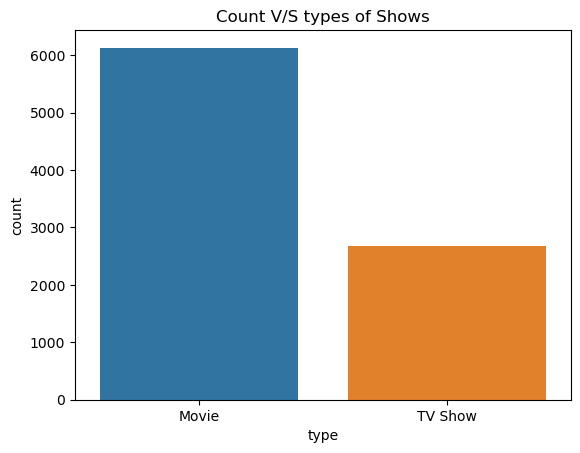

In [75]:
sns.countplot(x='type',data=df)
plt.title('Count V/S types of Shows')

- Result:  On netflix there are more number of Movies as comapre to TV shows

### Country Analysis

In [79]:
df['country'].value_counts().head(20)  ## top 10 or 20 country that has who produces content on netflix

United States                    2818
India                             972
Unavailable                       831
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise content on NETFLIX')

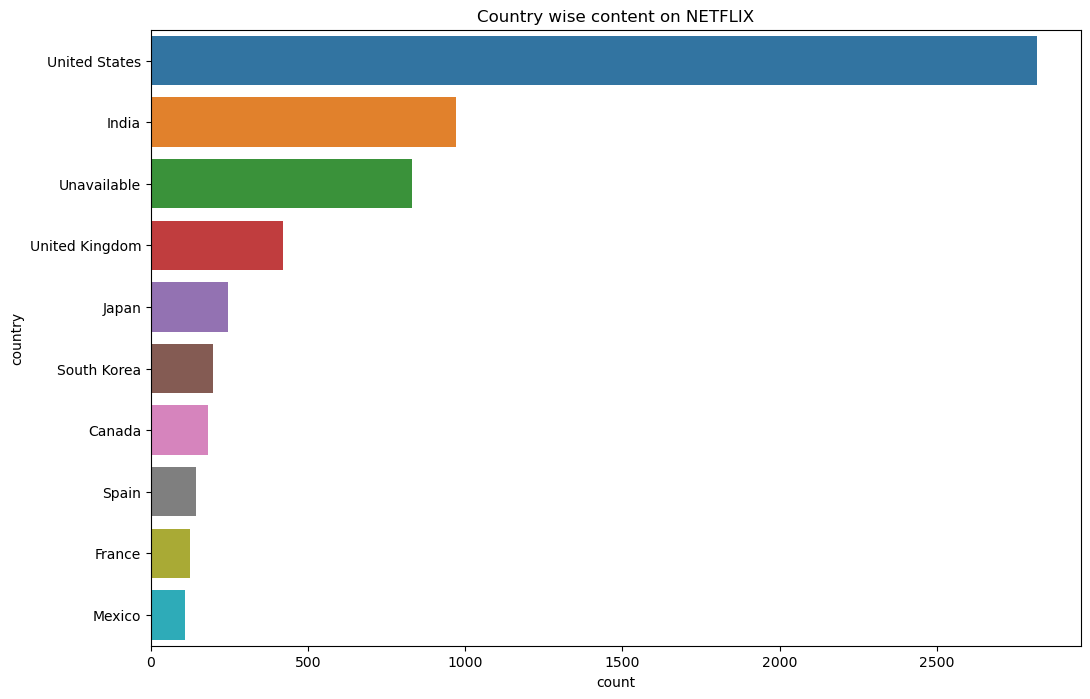

In [88]:
plt.figure(figsize=(12,8))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10], data=df)
plt.title('Country wise content on NETFLIX')

- Result: More content is created by UK

### Now we will check types of content based on country

In [96]:
movie_country=df[df['type']=='Movie']
tv_show_country=df[df['type']=='TV Show']

- PLot seperate graphs of Movies
- Plot separate graphs TV Shows

Text(0.5, 1.0, 'Top 10 coutries producing TV Shows on netflix')

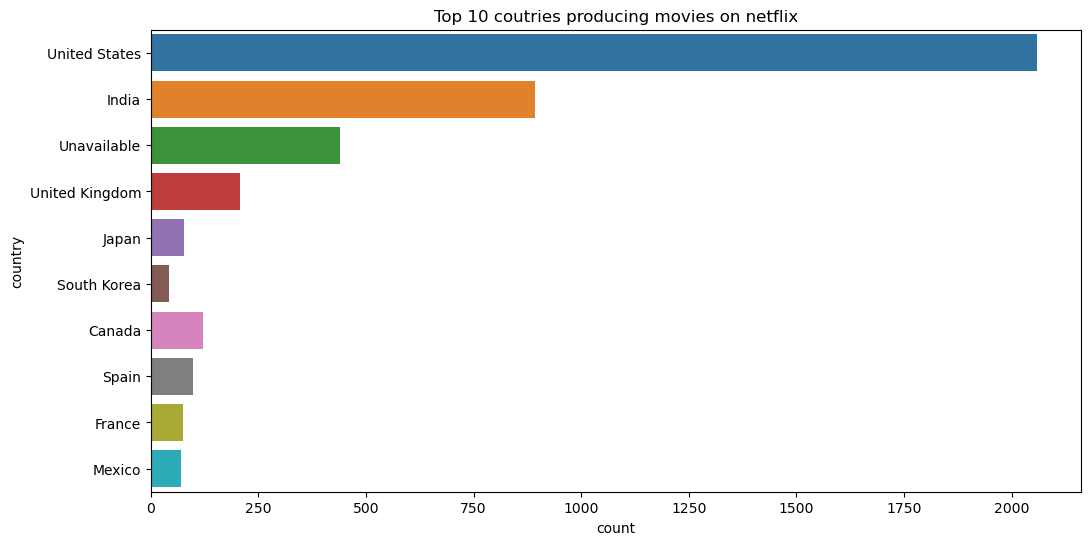

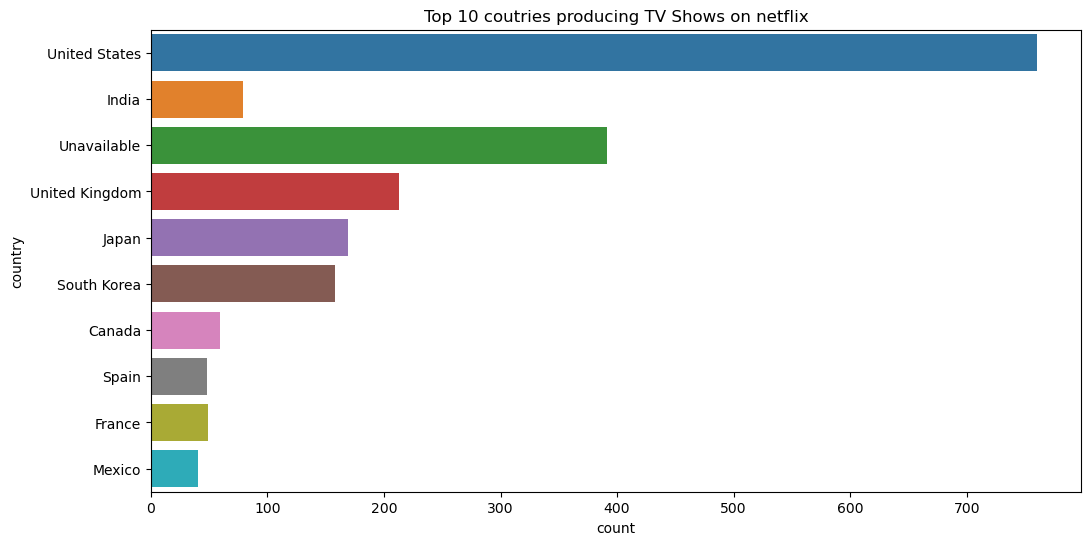

In [98]:
## for movies
plt.figure(figsize=(12,6))
sns.countplot(y='country', order=df['country'].value_counts().index[0:10],data=movie_country)
plt.title('Top 10 coutries producing movies on netflix')

## for tv shows

plt.figure(figsize=(12,6))
sns.countplot(y='country', order=df['country'].value_counts().index[0:10],data=tv_show_country)
plt.title('Top 10 coutries producing TV Shows on netflix')

- Now we will check major rating on netflix shows

In [99]:
df.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
Unavailable       4
NC-17             3
unavailable       3
UR                3
Name: rating, dtype: int64

- visualize this rating

Text(0.5, 1.0, 'Rating of shows on Netflix VS Counts')

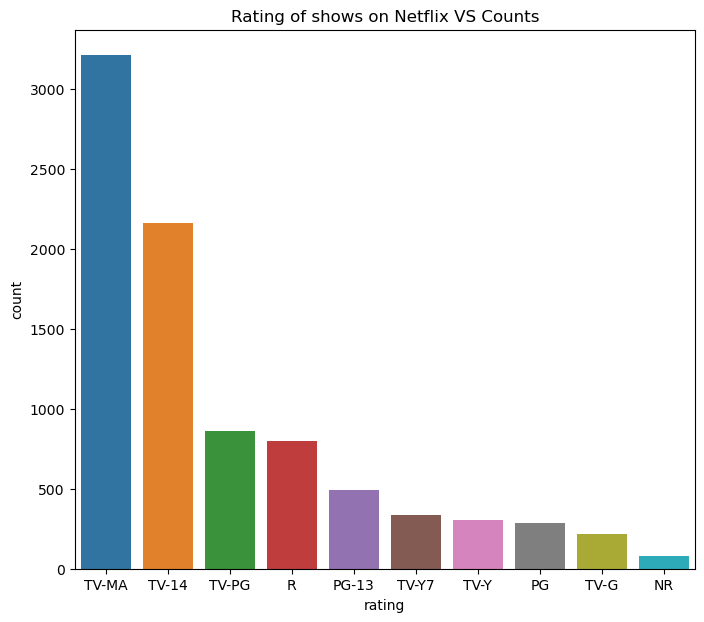

In [101]:
plt.figure(figsize=(8,7))
sns.countplot(x='rating',order=df.rating.value_counts().index[0:10],data=df)
plt.title('Rating of shows on Netflix VS Counts')

- Result: Most are the rating  or content are made is for  mature people and 14 age groip children is for TV-MA, TV-14

### check in which year netflix has made more content.

In [102]:
df.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

- we can see that in 2019 yr it has made more content
- but lets visualize this more clearly

Text(0.5, 1.0, 'Content release on Netflix VS Count')

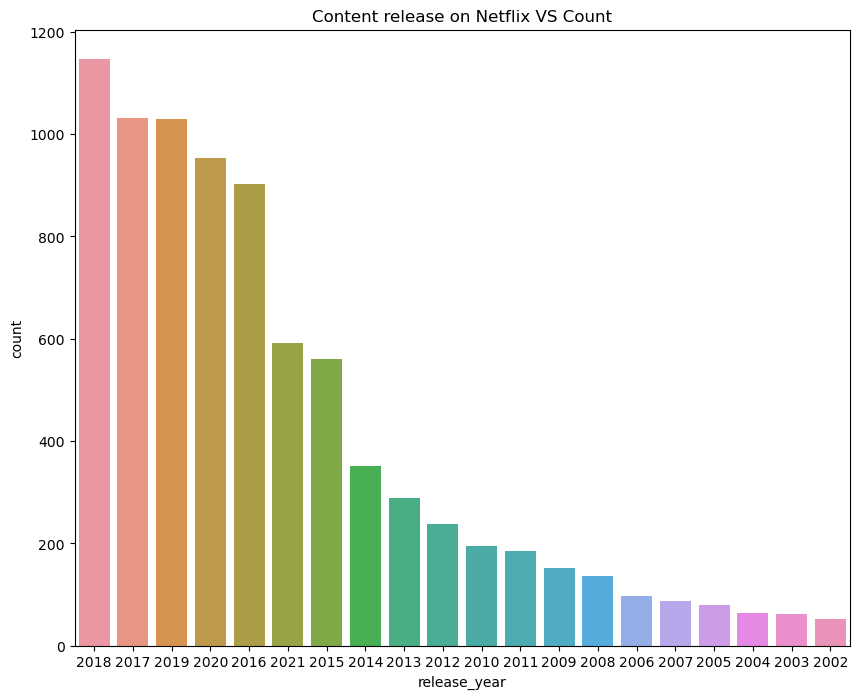

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(x='release_year',order=df.release_year.value_counts().index[0:20],data=df)
plt.title('Content release on Netflix VS Count')

- Result: (here is 10 yr content)
- In 2018 Netflix release highest number of content combining TV show and movies, then in 2017...

## Analysis of Popular Genres

In [111]:
df.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

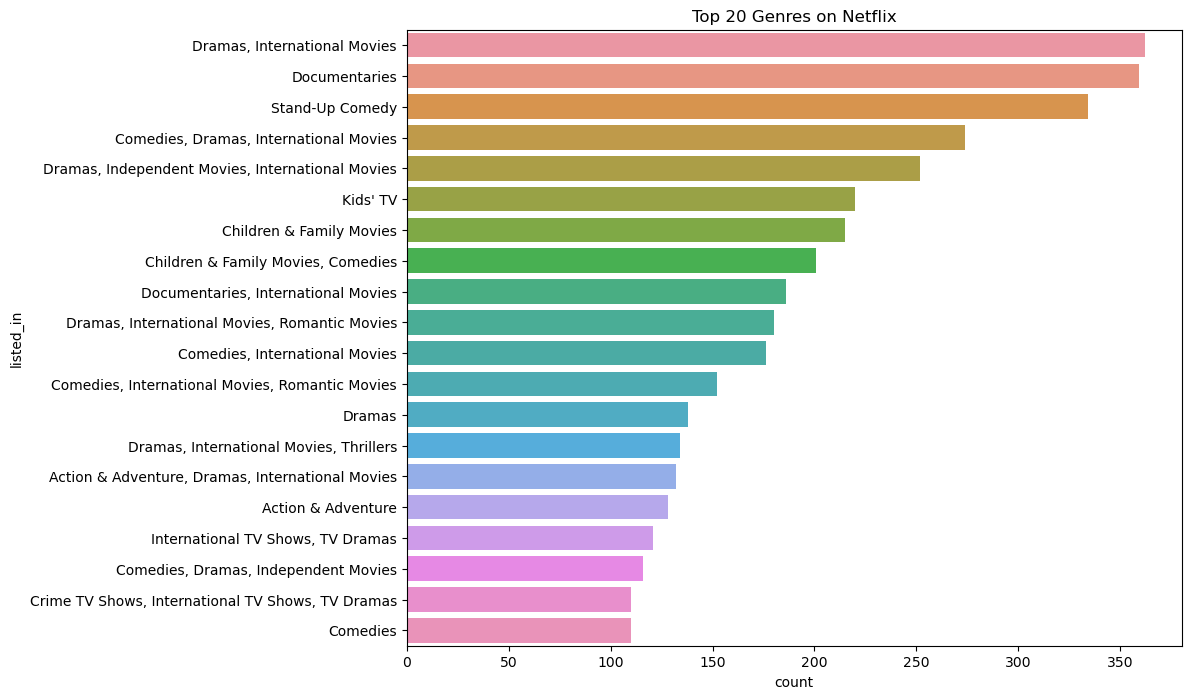

In [113]:
plt.figure(figsize=(10,8))
sns.countplot(y='listed_in',order=df.listed_in.value_counts().index[0:20],data=df)
plt.title('Top 20 Genres on Netflix')

- Result: We can say that the most popular genres on Netflix is Dramas,International Movies then so on...

#### TASKS WE PERFORMED THROUGHOUT THE ANALYSIS-
- We checked the distribution of movies and TV Shows that Netflix has Produced.
- We did Country analysis that which country has produced highest content.
- We checked separately that which country produced highest Movies and highest TV Shows (US produced highest in both cases).
- We have checked Rating about content,that which content produced highest rating.
- We checked Top 20 genres analysis.


# SUMMARY:

####  we did lots of operation to take usefull and meaningfull information from the Netflix dataset.The Result we get is:

- Netflix has more number of Movies then TV Shows.
- The more number of Movies and TV Shows are produced by United States.Second is India which produced more number of Movies and  TV show and so on
- Most of th Content(both Movies and TV Shows) is for Mature Audience ie; MA.
- In the year 2018 Netflix has released more number of content as compare to other years.
- Dramas and International movies is the most popular Genres on Netflix.
    